In [4]:
import pandas as pd
pd.set_option('display.max_rows', None)
from textblob import TextBlob
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
from nltk import FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer 
import matplotlib.pyplot as plt
import unidecode

def get_top_n_words(corpus, n=None):
  vec = CountVectorizer().fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0) 
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]

def get_top_n_bigram(corpus, n=None):
  vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0) 
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]

In [5]:
df = pd.read_csv('preprocessed/pre-processed.csv')
df.drop(columns=['index'], inplace=True)
df.sample(20).head()

,label,preprocessed_news
539,fake,cabral parte pra cima companheiro cela agride ...
1264,fake,proximo alvo vai partir tudo pra cima renan ca...
3516,fake,pastora americana profetizou deus abalara prin...
2131,fake,novo depoimento delator complica dilma tentado...
5459,true,primeiras paginas jornais hoje so destacam fun...


In [6]:
def remove_accents(input_str):
    only_ascii = unidecode.unidecode(input_str)
    return only_ascii

stops = list(set(stopwords.words('portuguese')))
for i in range(0, len(stops)):
  stops[i] = remove_accents(stops[i])

def remove_stopwords(text):
  words = text.split()
  words = [word for word in words if word not in stops]
  return ' '.join(words)

df['preprocessed_news'] = df['preprocessed_news'].apply(remove_stopwords)
df['review_length'] = df['preprocessed_news'].apply(lambda x: len(str(x)))
df['word_count'] = df['preprocessed_news'].apply(lambda x: len(str(x).split()))

In [7]:
df['polarity'] = df['preprocessed_news'].map(lambda text: TextBlob(text).sentiment.polarity)

In [8]:
df['polarity'].iplot(
  kind='hist',
  bins=50,
  xTitle='polarity',
  linecolor='black',
  yTitle='count',
  title='Sentiment Polarity Distribution')

In [9]:
df['review_length'].iplot(
  kind='hist',
  bins=100,
  xTitle='review length',
  linecolor='black',
  yTitle='count',
  title='Review Text Length Distribution')

In [10]:
df['word_count'].iplot(
  kind='hist',
  bins=100,
  xTitle='word count',
  linecolor='black',
  yTitle='count',
  title='Review Text Word Count Distribution')

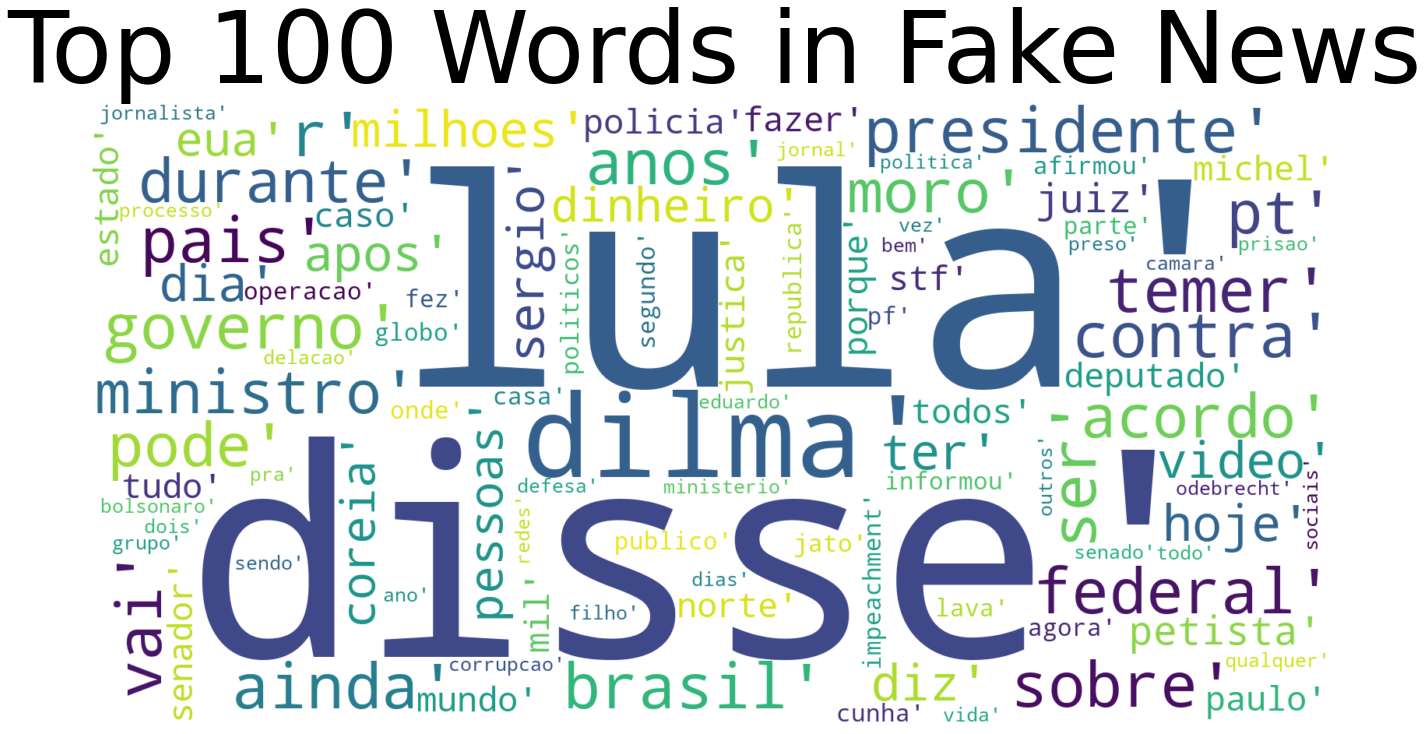

In [11]:
words = df.loc[df['label'] == 'fake']['preprocessed_news']
allwords = []
for wordlist in words:
  allwords += wordlist.split()

mostcommon = FreqDist(allwords).most_common(100)

wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Words in Fake News', fontsize=100)
plt.tight_layout(pad=0)
plt.show()


In [12]:
common_words_fake = get_top_n_words(df.loc[df['label'] == 'fake']['preprocessed_news'], 20)
dfcf = pd.DataFrame(common_words_fake, columns = ['preprocessed_news' , 'count'])
dfcf.groupby('preprocessed_news').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', 
    yTitle='Count', 
    linecolor='black', 
    title='Top 20 words in fake news')

In [13]:
common_bigrams_fake = get_top_n_bigram(df.loc[df['label'] == 'fake']['preprocessed_news'], 20)
dfbf = pd.DataFrame(common_bigrams_fake, columns = ['preprocessed_news' , 'count'])
dfbf.groupby('preprocessed_news').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', 
    yTitle='Count', 
    linecolor='black', 
    title='Top 20 bigrams in fake news')

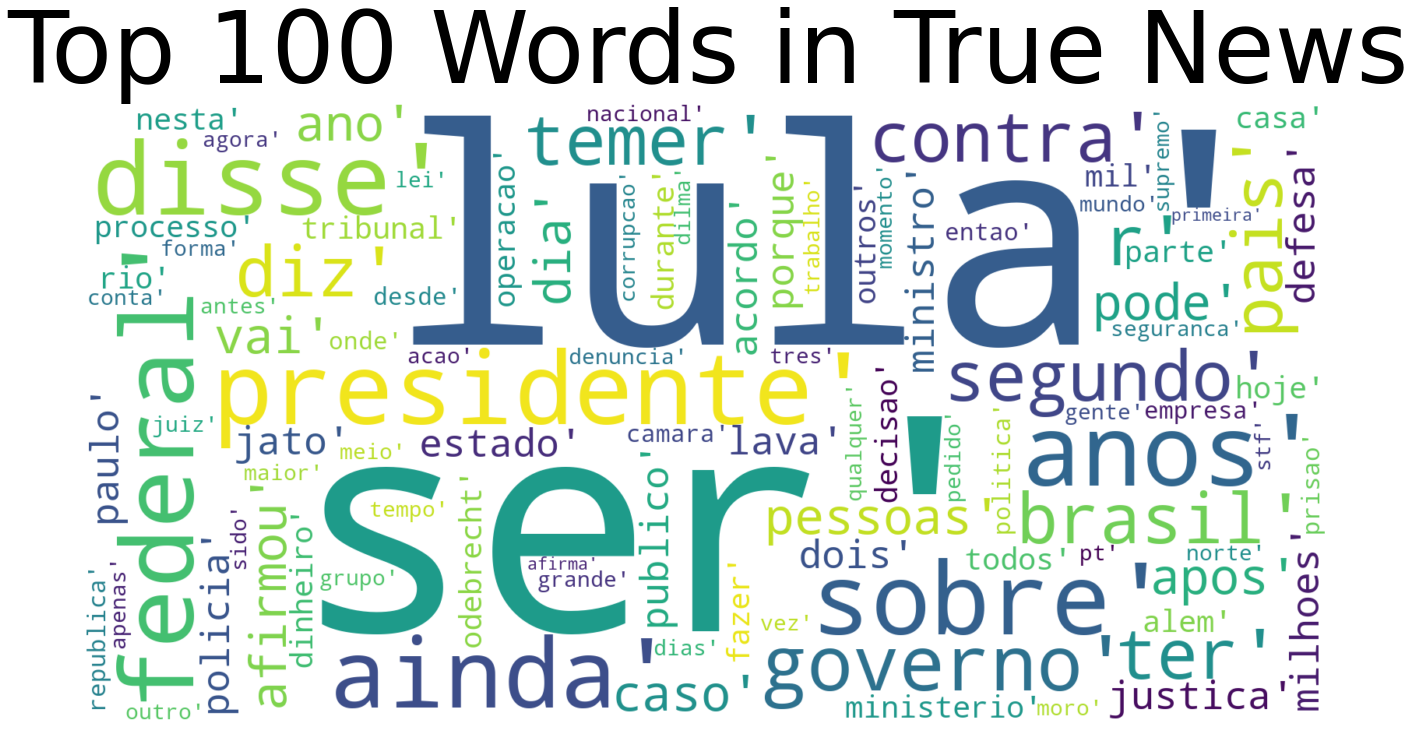

In [14]:
words_true = df.loc[df['label'] == 'true']['preprocessed_news']
allwords_true = []
for wordlist_true in words_true:
  allwords_true += wordlist_true.split()

mostcommon_true = FreqDist(allwords_true).most_common(100)

wordcloud_true = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon_true))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud_true, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Words in True News', fontsize=100)
plt.tight_layout(pad=0)
plt.show()


In [15]:
common_words_true = get_top_n_words(df.loc[df['label'] == 'true']['preprocessed_news'], 20)
dfct = pd.DataFrame(common_words_true, columns = ['preprocessed_news' , 'count'])
dfct.groupby('preprocessed_news').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', 
    yTitle='Count', 
    linecolor='black', 
    title='Top 20 words in true news')

In [16]:
common_bigrams_true = get_top_n_bigram(df.loc[df['label'] == 'true']['preprocessed_news'], 20)
dfbt = pd.DataFrame(common_bigrams_true, columns = ['preprocessed_news' , 'count'])
dfbt.groupby('preprocessed_news').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', 
    yTitle='Count', 
    linecolor='black', 
    title='Top 20 bigrams in true news')

In [17]:

blob = TextBlob(str(df['preprocessed_news']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.iplot(
  kind='bar',
  xTitle='POS',
  yTitle='count', 
  title='Top 20 Part-of-speech tagging for news corpus')